In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import extract_memory
layout=extract_memory.get_header_format('memory_layout.h')

In [3]:
from multiprocessing import shared_memory

NAME='NW_SRC0_HDR'
existing_shm = shared_memory.SharedMemory(name=NAME)

In [4]:
bytes=existing_shm.buf[0:256]

In [5]:
layout

(81,
 {'lock': {'type': 'uint8_t',
   'num_elements': 1,
   'num_bytes': 1,
   'bytenum_current': 0,
   'init': '0'},
  'header_version': {'type': 'uint8_t',
   'num_elements': 1,
   'num_bytes': 1,
   'bytenum_current': 1,
   'init': '1'},
  'manager_port_num': {'type': 'uint16_t',
   'num_elements': 1,
   'num_bytes': 2,
   'bytenum_current': 2,
   'init': ''},
  'dimensions': {'type': 'uint16_t',
   'num_elements': 4,
   'num_bytes': 8,
   'bytenum_current': 4,
   'init': ''},
  'datatype_code': {'type': 'uint16_t',
   'num_elements': 1,
   'num_bytes': 2,
   'bytenum_current': 12,
   'init': ''},
  'num_ring_frames': {'type': 'uint8_t',
   'num_elements': 1,
   'num_bytes': 1,
   'bytenum_current': 14,
   'init': ''},
  'current_frame': {'type': 'uint8_t',
   'num_elements': 1,
   'num_bytes': 1,
   'bytenum_current': 15,
   'init': ''},
  'max_frames': {'type': 'uint8_t',
   'num_elements': 1,
   'num_bytes': 1,
   'bytenum_current': 16,
   'init': '4'},
  'timestamps': {'type': '

In [8]:
bytes[ layout[1]['current_frame']['bytenum_current'] ]

7

In [8]:
layout[1].keys()

dict_keys(['lock', 'header_version', 'manager_port_num', 'dimensions', 'datatype_code', 'num_ring_frames', 'current_frame', 'max_frames', 'timestamps', 'statuses'])

In [10]:
layout[1]['timestamps']

{'type': 'uint64_t',
 'num_elements': 32,
 'num_bytes': 256,
 'bytenum_current': 17,
 'init': ''}

In [19]:
current=bytes[layout[1]['current_frame']['bytenum_current']]
height=bytes[layout[1]['dimensions']['bytenum_current']]
width=bytes[layout[1]['dimensions']['bytenum_current']+1]

addr_t1=bytes[layout[1]['timestamps']['bytenum_current']:layout[1]['timestamps']['bytenum_current']+8]
t1=np.frombuffer( addr_t1, 'uint64', count=1)

addr_t2=bytes[layout[1]['timestamps']['bytenum_current']+8:layout[1]['timestamps']['bytenum_current']+16]
t2=np.frombuffer( addr_t2, 'uint64', count=1)

In [20]:
print( current, t1, t2, t2-t1, 1e6/(t2-t1))

6 [80021602034097] [80021614229571] [12195474] [0.08199763]


In [24]:
for n in[0,1,2]:
    print( extract_memory.get_array_item(layout,bytes,'dimensions',n) )

2048
2048
0


In [15]:
.pytpe

In [16]:
height=np.frombuffer(bytes[layout[1]['dimensions']['bytenum_current']:
                           layout[1]['dimensions']['bytenum_current']+2], 'uint16', count=1)
print( height)

In [ ]:
width=np.frombuffer(bytes[layout[1]['dimensions']['bytenum_current']+2:
                           layout[1]['dimensions']['bytenum_current']+4], 'uint16', count=1)
print( width)

In [ ]:
extract_memory.numbytes['uint16_t']

In [ ]:
layout[1]['dimensions']

In [49]:
NAME='NW_SRC0_BUFFER'
buffer0 = shared_memory.SharedMemory(name=NAME)

In [50]:
bytez=buffer0.buf[0:2048*2048]
fram=np.frombuffer( bytez, 'uint8', 2048*2048)

In [51]:
fram = np.reshape( fram, (2048,2048) )

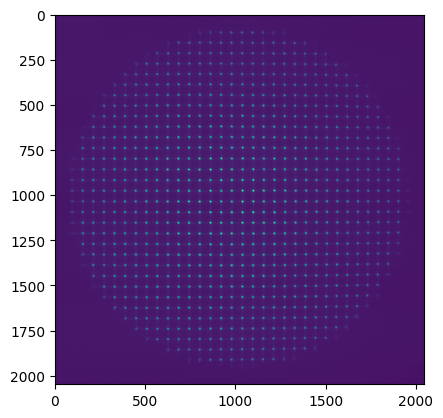

In [52]:
plt.imshow(fram)

In [55]:
fram.tofile('spots.bin')